# CROP YIELD PREDICTION USING LINEAR REGRESSION

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Akshaj000/CropYieldPrediction-LinearRegression/blob/main/notebook.ipynb)



## Importing the Required modules and libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Reading and Analysing the data

In [2]:
data = pd.read_csv('./dataset.csv')
data

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"
...,...,...,...,...,...,...,...,...,...
995,614,6.379,94.132,11.571,5,98.673,2.891,6,"c,b"
996,490,6.980,82.727,11.264,5,101.090,3.500,6,"d,c,b"
997,392,NaN,58.218,11.859,4,103.673,4.005,6,"c,b,a"
998,773,10.070,67.905,11.567,4,104.343,2.339,6,a


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


In [4]:
data.drop('id', inplace=True, axis=1)
data.drop('categories', inplace=True, axis=1)

In [5]:
data.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
0,5.615,65.281,3.230,0,7.977,8.969,0
1,7.044,73.319,9.081,0,23.009,7.197,0
2,5.607,60.038,2.864,2,23.019,7.424,0
3,9.346,64.719,2.797,2,28.066,1.256,0
4,7.969,NaN,5.407,1,29.140,0.274,0


BEFORE


<AxesSubplot:xlabel='water', ylabel='yield'>

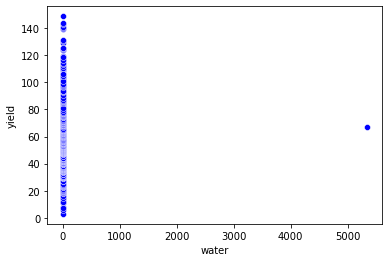

In [6]:
print("BEFORE")
sns.scatterplot(data=data, x='water', y='yield',color='b')

In [7]:
for i in data.columns: #replacing Nan with median
    print("replacing Nan value of ",i," with its meadian ",data[str(i)].median())
    data[str(i)].fillna(data[str(i)].median(), inplace=True)

replacing Nan value of  water  with its meadian  6.476
replacing Nan value of  uv  with its meadian  73.689
replacing Nan value of  area  with its meadian  7.987500000000001
replacing Nan value of  fertilizer_usage  with its meadian  2.0
replacing Nan value of  yield  with its meadian  55.602500000000006
replacing Nan value of  pesticides  with its meadian  3.2755
replacing Nan value of  region  with its meadian  2.0


In [8]:
for i in data['water']:
    if i>20:
        print(i)

5340.0


In [9]:
data['water'].replace(5340,5.340, inplace=True) #replacing value of water above 20

AFTER


<AxesSubplot:xlabel='water', ylabel='yield'>

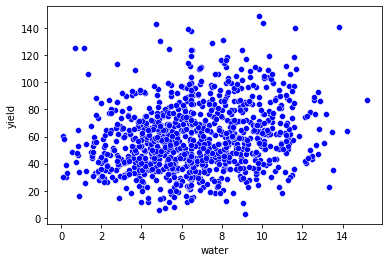

In [10]:
print("AFTER")
sns.scatterplot(data=data, x='water', y='yield',color='b')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   water             1000 non-null   float64
 1   uv                1000 non-null   float64
 2   area              1000 non-null   float64
 3   fertilizer_usage  1000 non-null   int64  
 4   yield             1000 non-null   float64
 5   pesticides        1000 non-null   float64
 6   region            1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [12]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,6.647489,73.943795,8.098848,2.12300,58.758571,3.452301,3.039000
std,2.759503,9.648126,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.695500,66.931500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.609250,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,15.214000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


In [13]:
data.shape

(1000, 7)

In [14]:
data.columns

Index(['water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region'],
      dtype='object')

## Visualising the data

<AxesSubplot:xlabel='yield', ylabel='Count'>

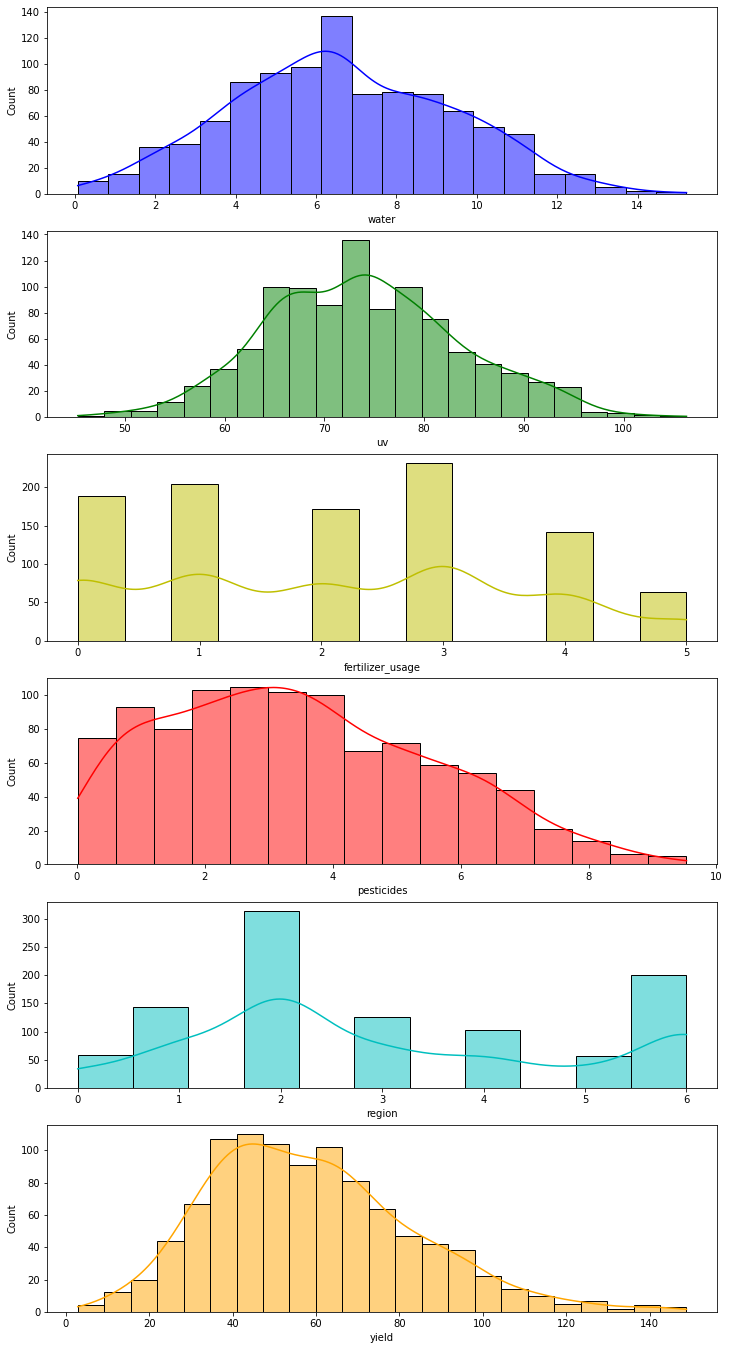

In [15]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.histplot(data.water,color='b',ax=ax[0], kde=True)
sns.histplot(data.uv,color='g',ax=ax[1], kde=True)
sns.histplot(data.fertilizer_usage,color='y',ax=ax[2], kde=True)
sns.histplot(data.pesticides,color='r',ax=ax[3], kde=True)
sns.histplot(data.region,color='c',ax=ax[4], kde=True)
sns.histplot(data['yield'],color='orange',ax=ax[5], kde=True)

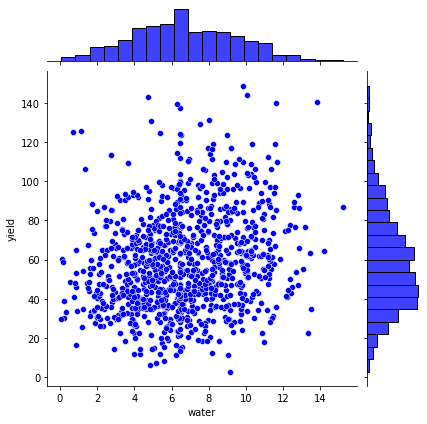

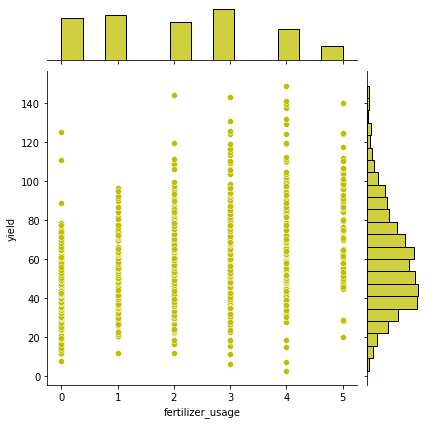

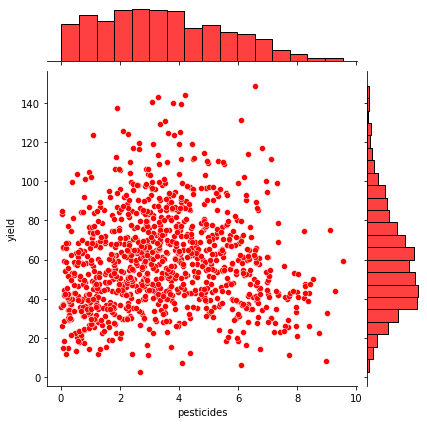

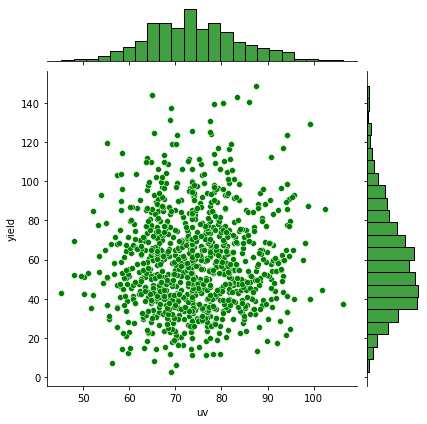

In [16]:
sns.jointplot(x='water',y='yield',data=data, color='b')
sns.jointplot(x='fertilizer_usage', y='yield',data=data, color='y')
sns.jointplot(x='pesticides', y='yield',data=data, color='r')
sns.jointplot(x='uv', y='yield',data=data, color='g')

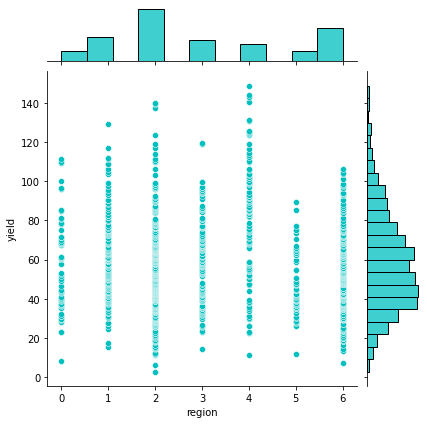

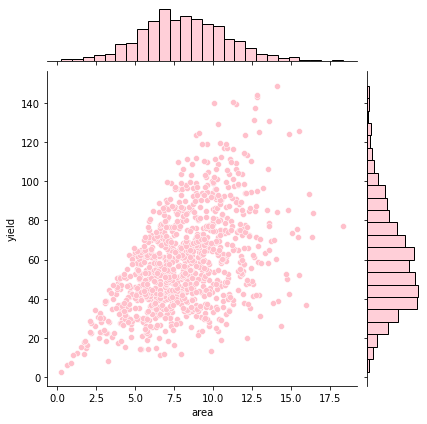

In [17]:
sns.jointplot(x='region', y='yield',data=data, color='c', ax=ax[0])
sns.jointplot(x='area', y='yield',data=data, color='pink', ax=ax[1])

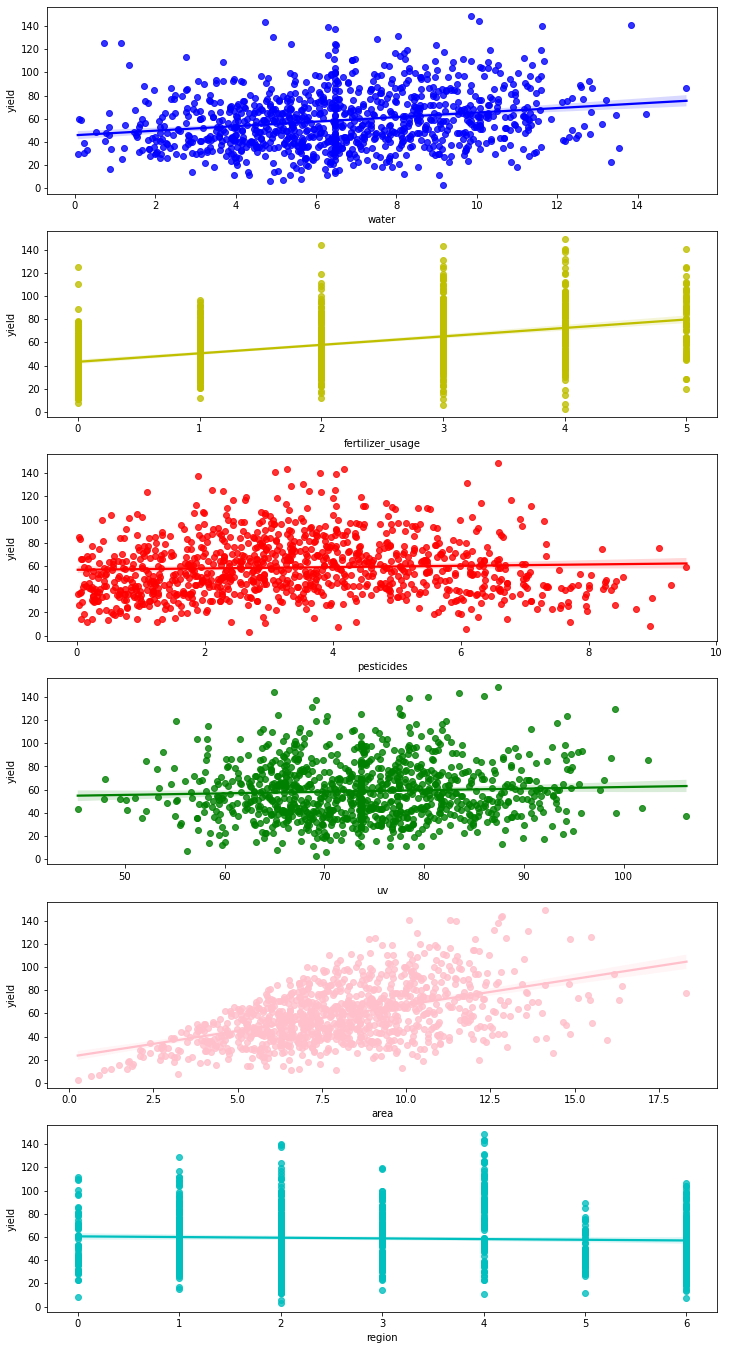

In [18]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.regplot(x="water", y="yield", data=data, color='b', ax=ax[0]);
sns.regplot(x="fertilizer_usage", y="yield", data=data, color='y', ax=ax[1]);
sns.regplot(x="pesticides", y="yield", data=data, color='r', ax=ax[2]);
sns.regplot(x="uv", y="yield", data=data, color='g', ax=ax[3]);
sns.regplot(x="area", y="yield", data=data, color='pink', ax=ax[4]);
sns.regplot(x="region", y="yield", data=data, color='c', ax=ax[5]);

In [19]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,water,uv,area,fertilizer_usage,yield,pesticides,region
water,1.000000,-0.037040,-0.204170,0.357376,0.219048,-0.010996,0.000216
uv,-0.037040,1.000000,0.117445,-0.041760,0.053279,0.005701,-0.046474
area,-0.204170,0.117445,1.000000,-0.202512,0.491220,0.036302,0.369481
fertilizer_usage,0.357376,-0.041760,-0.202512,1.000000,0.452183,-0.056462,0.022406
yield,0.219048,0.053279,0.491220,0.452183,1.000000,0.048380,-0.045051
pesticides,-0.010996,0.005701,0.036302,-0.056462,0.048380,1.000000,-0.010899
region,0.000216,-0.046474,0.369481,0.022406,-0.045051,-0.010899,1.000000


<AxesSubplot:>

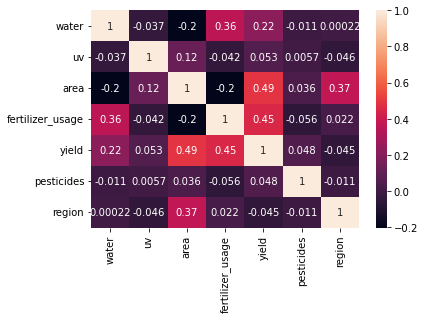

In [20]:
sns.heatmap(data=corr, annot=True)

## Spliting Data to Training and Testing.

In [21]:
np.random.seed(0)
data_train, data_test = train_test_split(
    data, train_size = 0.8, 
    test_size = 0.2, 
    random_state = 100
)

In [22]:
data_train.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
675,4.923,90.242,7.524,4,68.295,0.164,4
358,1.598,71.792,8.305,1,52.913,6.187,2
159,4.064,81.622,7.495,3,72.568,3.344,1
533,8.684,57.248,10.176,1,36.008,0.014,3
678,6.084,70.801,10.207,1,69.490,3.103,4


In [23]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,6.647489,73.943795,8.098848,2.12300,58.758571,3.452301,3.039000
std,2.759503,9.648126,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.695500,66.931500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.609250,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,15.214000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


### Considering all the columns to predict yield

In [24]:
X_train = data_train.iloc[:, [0,1,2,3,5,6]]
y_train = data_train['yield']
X_test = data_test.iloc[:, [0,1,2,3,5,6]]
y_test = data_test['yield']

In [25]:
y_train

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
        ...  
855    39.515
871    43.779
835    33.832
792    67.094
520    26.347
Name: yield, Length: 800, dtype: float64

In [26]:
X_train

,water,uv,area,fertilizer_usage,pesticides,region
675,4.923,90.242,7.524,4,0.164,4
358,1.598,71.792,8.305,1,6.187,2
159,4.064,81.622,7.495,3,3.344,1
533,8.684,57.248,10.176,1,0.014,3
678,6.084,70.801,10.207,1,3.103,4
...,...,...,...,...,...,...
855,5.415,80.406,8.660,2,0.565,6
871,3.895,63.483,7.696,4,7.281,6
835,6.372,72.873,9.036,0,5.085,6
792,6.833,75.587,12.893,2,5.742,5


In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_train_pred[:20]

array([61.74059378, 48.49271427, 67.19468333, 64.55832936, 57.48567721,
       66.1804659 , 70.75778994, 43.63189072, 72.43095334, 82.30330675,
       89.59522553, 50.40233709, 83.13433504, 62.98596139, 34.33125575,
       65.12797682, 56.48733861, 69.316479  , 68.12760697, 50.7230954 ])

In [28]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))


Mean squared error :  191.52963091293861
Root Mean Squared error :  13.839423070089975


In [29]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.6730712273632777 
R square value of test data :  0.7109082758102737


### Considering attributes those are result of feature selection

In [30]:
rfe = RFE(reg)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('water', False, 2),
 ('uv', False, 4),
 ('area', True, 1),
 ('fertilizer_usage', True, 1),
 ('pesticides', False, 3),
 ('region', True, 1)]

In [31]:
X_train.columns[rfe.support_]

Index(['area', 'fertilizer_usage', 'region'], dtype='object')

In [32]:
X_train = data_train.iloc[:, [2,3,6]]
X_test = data_test.iloc[:, [2,3,6]]
X_train.head()

,area,fertilizer_usage,region
675,7.524,4,4
358,8.305,1,2
159,7.495,3,1
533,10.176,1,3
678,10.207,1,4


In [33]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [34]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  212.74031234640768
Root Mean Squared error :  14.585620053546153


In [35]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.6435052166484538 
R square value of test data :  0.6788932166384223


### Only considering Water to predict yield.

In [36]:
y_train = data_train['yield']
X_train = data_train.iloc[:, [0]]
y_test = data_test['yield']
X_test = data_test.iloc[:, [0]]

In [37]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [38]:
X_train.head()

,water
675,4.923
358,1.598
159,4.064
533,8.684
678,6.084


In [39]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_train_pred[:10]

array([55.31807015, 49.04264409, 53.69683978, 62.41637914, 57.50927907,
       54.54614556, 61.48214278, 67.07246217, 63.95456628, 56.97704744])

In [40]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  628.0203332114421
Root Mean Squared error :  25.06033386073382


In [41]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.045521810669382545 
R square value of test data :  0.052076276193369964


### Only considering UV to predict yield.

In [42]:
y_train = data_train['yield']
X_train = data_train.iloc[:, [1]]
y_test = data_test['yield']
X_test = data_test.iloc[:, [1]]

In [43]:
X_train.head()

,uv
675,90.242
358,71.792
159,81.622
533,57.248
678,70.801


In [44]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [45]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [46]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  661.4027580021278
Root Mean Squared error :  25.717751806915935


In [47]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.0007477317494392066 
R square value of test data :  0.0016893846488447162


### Only considering area to predict yield.

In [48]:
X_train = data_train.iloc[:, [2]]
X_test = data_test.iloc[:, [2]]

In [49]:
X_train.head()

,area
675,7.524
358,8.305
159,7.495
533,10.176
678,10.207


In [50]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [51]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [52]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  465.67830761378804
Root Mean Squared error :  21.579580802550083


In [53]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.2227122562742917 
R square value of test data :  0.29711270144399704


### Only considering fertilizer_usage to predict yield.

In [54]:
X_train = data_train.iloc[:, [3]]
X_test = data_test.iloc[:, [3]]

In [55]:
X_train.head()

,fertilizer_usage
675,4
358,1
159,3
533,1
678,1


In [56]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [57]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  533.0587635252961
Root Mean Squared error :  23.088065391567483


In [58]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.20586877480966415 
R square value of test data :  0.19540973212640833


### Only considering pesticides to predict yield.

In [59]:
X_train = data_train.iloc[:, [5]]
X_test = data_test.iloc[:, [5]]
X_train.head()

,pesticides
675,0.164
358,6.187
159,3.344
533,0.014
678,3.103


In [60]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [61]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  662.2569831934104
Root Mean Squared error :  25.7343541437008


In [62]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.0006052339659345929 
R square value of test data :  0.00040003097433960466


### Only considering region to predict yield.

In [63]:
X_train = data_train.iloc[:, [6]]
X_test = data_test.iloc[:, [6]]
X_train.head()

,region
675,4
358,2
159,1
533,3
678,4


In [64]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [65]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  662.7690489384782
Root Mean Squared error :  25.744301290547355


In [66]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.00047055254515937506 
R square value of test data :  -0.0003728727713343538


In [67]:
l = []
c = []
for i in range(7):
    if i != 4:
        X_train = data_train.iloc[:, [i]]
        X_test = data_test.iloc[:, [i]]
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        y_test_pred=reg.predict(X_test)
        l.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
        c.append(data_test.columns[i])
print(l)
print(c)

[25.06033386073382, 25.717751806915935, 21.579580802550083, 23.088065391567483, 25.7343541437008, 25.744301290547355]
['water', 'uv', 'area', 'fertilizer_usage', 'pesticides', 'region']


<AxesSubplot:>

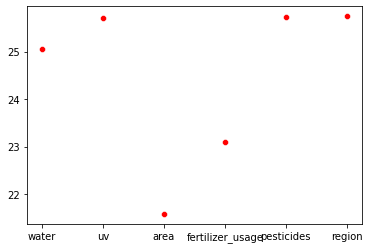

In [68]:
sns.scatterplot(x=c, y=l, color='r')

From the above data we can see that area has the least mean squared error followed by fertilizer usage.

### Considering area and water to predict yield.

In [69]:
X_train = data_train.iloc[:, [2,0]]
X_test = data_test.iloc[:, [2,0]]
X_train.head()

,area,water
675,7.524,4.923
358,8.305,1.598
159,7.495,4.064
533,10.176,8.684
678,10.207,6.084


In [70]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [71]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  373.4738021563229
Root Mean Squared error :  19.32547029586403


In [72]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.3198488330267375 
R square value of test data :  0.43628468926491093


### Considering area and UV to predict yield

In [73]:
X_train = data_train.iloc[:, [2,1]]
X_test = data_test.iloc[:, [2,1]]
X_train.head()

,area,uv
675,7.524,90.242
358,8.305,71.792
159,7.495,81.622
533,10.176,57.248
678,10.207,70.801


In [74]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [75]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  467.8522684320345
Root Mean Squared error :  21.629892936212944


In [76]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.2232253566838398 
R square value of test data :  0.2938313601796083


### Considering pesticides and area to predict yield

In [77]:
X_train = data_train.iloc[:, [5,2]]
X_test = data_test.iloc[:, [5,2]]
X_train.head()

,pesticides,area
675,0.164,7.524
358,6.187,8.305
159,3.344,7.495
533,0.014,10.176
678,3.103,10.207


In [78]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [79]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  464.15947912525075
Root Mean Squared error :  21.54436072677142


In [80]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.2232080658376161 
R square value of test data :  0.29940519657598696


### Considering area and fertilizer usage to predict yield

In [81]:
X_train = data_train.iloc[:, [2,3]]
X_test = data_test.iloc[:, [2,3]]
X_train.head()

,area,fertilizer_usage
675,7.524,4
358,8.305,1
159,7.495,3
533,10.176,1
678,10.207,1


In [82]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [83]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  270.12908834520806
Root Mean Squared error :  16.435604289018645


In [84]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.547529992991408 
R square value of test data :  0.5922715272238347


### Considering area and region to predict yield

In [85]:
X_train = data_train.iloc[:, [2,6]]
X_test = data_test.iloc[:, [2,6]]
X_train.head()

,area,region
675,7.524,4
358,8.305,2
159,7.495,1
533,10.176,3
678,10.207,4


In [86]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [87]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  404.57538643017267
Root Mean Squared error :  20.114059421960867


In [88]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.27290346040986413 
R square value of test data :  0.38934046147152934


### Considering Area, Pesticides and Fertiliser to predict yield

In [89]:
X_train = data_train.iloc[:, [5,2,3]]
X_test = data_test.iloc[:, [5,2,3]]
X_train.head()

,pesticides,area,fertilizer_usage
675,0.164,7.524,4
358,6.187,8.305,1
159,3.344,7.495,3
533,0.014,10.176,1
678,3.103,10.207,1


In [90]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [91]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  269.00216351587585
Root Mean Squared error :  16.40128542266965


In [92]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.551565591840254 
R square value of test data :  0.5939724893172245


### Considering Area, Pesticides, Fertilizer and region to predict yield

In [93]:
X_train = data_train.iloc[:, [5,2,3,6]]
X_test = data_test.iloc[:, [5,2,3,6]]
X_train.head()

,pesticides,area,fertilizer_usage,region
675,0.164,7.524,4,4
358,6.187,8.305,1,2
159,3.344,7.495,3,1
533,0.014,10.176,1,3
678,3.103,10.207,1,4


In [94]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [95]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  211.35557629908803
Root Mean Squared error :  14.538073335180561


In [96]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.6464680867924696 
R square value of test data :  0.6809833148104867


### Using Polynomial regression to predict yield based on all paramters

In [97]:
X_train = data_train.iloc[:, [0,1,2,3,5,6]].values
y_train = data_train.iloc[:,4].values
X_test = data_test.iloc[:, [0,1,2,3,5,6]].values
y_train = data_train.iloc[:,4].values

In [98]:
X_train[:3]

array([[ 4.923, 90.242,  7.524,  4.   ,  0.164,  4.   ],
       [ 1.598, 71.792,  8.305,  1.   ,  6.187,  2.   ],
       [ 4.064, 81.622,  7.495,  3.   ,  3.344,  1.   ]])

In [99]:
y_train[:3]

array([68.295, 52.913, 72.568])

#### Using two degree polynomial

In [100]:
poly_reg2=PolynomialFeatures(degree=2)
X_train_poly=poly_reg2.fit_transform(X_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_train_poly,y_train)
X_test_poly=poly_reg2.fit_transform(X_test)
y_test_pred=lin_reg_2.predict(X_test_poly)

In [101]:
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  65.4358789803128
Root Mean Squared error :  8.089244648316232


In [102]:
r2_score_train=lin_reg_2.score(X_train_poly,y_train)
r2_score_test=lin_reg_2.score(X_test_poly,y_test)
print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.8536932340550913 
R square value of test data :  0.9012321436212251


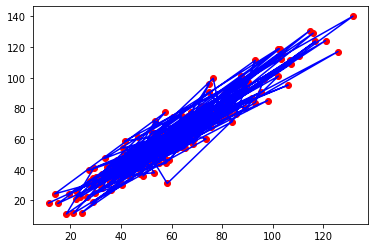

In [103]:
plt.scatter(y_test_pred, y_test, color = 'red')
plt.plot(y_test_pred, y_test, color = 'blue')

#### Using three degree polynomial

In [104]:
poly_reg3=PolynomialFeatures(degree=3)
X_train_poly=poly_reg3.fit_transform(X_train)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_train_poly,y_train)
X_test_poly=poly_reg3.fit_transform(X_test)
y_test_pred=lin_reg_3.predict(X_test_poly)

In [105]:
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  60.454059487028786
Root Mean Squared error :  7.775220864195999


In [106]:
r2_score_train=lin_reg_3.score(X_train_poly,y_train)
r2_score_test=lin_reg_3.score(X_test_poly,y_test)
print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.8971589079381377 
R square value of test data :  0.908751621312748


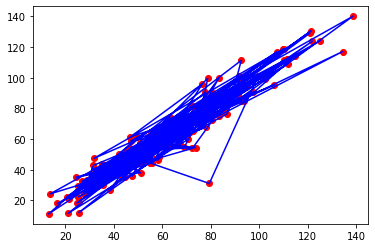

In [107]:
plt.scatter(y_test_pred, y_test, color = 'red')
plt.plot(y_test_pred, y_test, color = 'blue')

###### Better performance so far

##### Using four degree polynomial

In [108]:
poly_reg4=PolynomialFeatures(degree=4)
X_train_poly=poly_reg4.fit_transform(X_train)
lin_reg_4=LinearRegression()
lin_reg_4.fit(X_train_poly,y_train)
X_test_poly=poly_reg4.fit_transform(X_test)
y_test_pred=lin_reg_4.predict(X_test_poly)

In [109]:
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  80.20412564494087
Root Mean Squared error :  8.955675610747683


In [110]:
r2_score_train=lin_reg_4.score(X_train_poly,y_train)
r2_score_test=lin_reg_4.score(X_test_poly,y_test)
print("R square value of train data: ",r2_score_train,"\nR square value of test data : ",r2_score_test)

R square value of train data:  0.9282256006265408 
R square value of test data :  0.8789411911916389


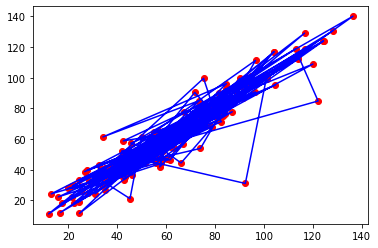

In [111]:
plt.scatter(y_test_pred, y_test, color = 'red')
plt.plot(y_test_pred, y_test, color = 'blue')

###### Polynomial of degree 4 performed bad

# Enter input to predict your yield based on water,	uv,	area,	fertilizer_usage,	pesticides and region

In [112]:
data_test

,water,uv,area,fertilizer_usage,yield,pesticides,region
249,6.538,77.068,10.015,0,33.027,7.951,2
353,10.732,73.689,7.242,1,51.860,7.048,2
537,0.237,82.551,7.609,1,38.776,0.675,3
424,8.487,68.603,6.035,3,65.210,5.457,2
564,9.308,81.528,7.130,2,54.124,0.143,3
...,...,...,...,...,...,...,...
684,12.254,69.971,10.755,3,75.168,9.096,4
644,7.803,77.634,5.941,1,25.983,7.957,4
110,10.074,62.921,4.007,3,50.982,2.850,1
28,4.010,68.326,8.380,3,52.876,0.336,0


In [113]:
water = float(input("Water : "))
uv = float(input("UV : "))
area = float(input("Area : "))
fertilizer = float(input("Fertilizer : "))
pesticide = float(input("Pesticide : "))
region = float(input("area : "))

Water : 4.010
UV : 68.326
Area : 8.380
Fertilizer : 3
Pesticide : 0.336
area : 0


In [114]:
X_test = [[water,uv,area,fertilizer,pesticide,region]]
X_test

[[4.01, 68.326, 8.38, 3.0, 0.336, 0.0]]

In [115]:
poly_reg3=PolynomialFeatures(degree=3)
X_train_poly=poly_reg3.fit_transform(X_train)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_train_poly,y_train)
X_test_poly=poly_reg3.fit_transform(X_test)
y_test_pred=lin_reg_3.predict(X_test_poly)

In [116]:
print("yield is approximately : ",y_test_pred[0])

yield is approximately :  52.40182187010214
